In [2]:
import numpy as np
import textblob as textblob
import praw
from datetime import datetime
import matplotlib.pyplot as plt
import json
import creds
from pprint import pprint
import pandas as pd

In [3]:
#Importing NLTK library and associated packaged

import nltk
nltk.__version__
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag_sents
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Importing textblob to compare sentiment analysis results with those from nltk

from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/AllysonEnglish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/AllysonEnglish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AllysonEnglish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
# Reddit API wrapper 

reddit = praw.Reddit(client_id=creds.client_id, \
                     client_secret=creds.client_secret, \
                     user_agent=creds.user_agent, \
                     username=creds.username, \
                     password=creds.password)

In [5]:
#Getting daily ID for the Coronavirus daily discussion post

subreddit = reddit.subreddit('Coronavirus')

In [11]:
#Gets discussion id for that days daily discussion

discussion_id = str(list(subreddit.hot(limit=1)))
final_id = discussion_id.replace("[Submission(id='","").replace("')]","")
print(final_id)

ghnx5y


In [9]:
#pulls all discussion ids available 

discussion_ids = []

for submission in subreddit.search('Daily Discussion Post'):
    if 'Daily Discussion Post' in submission.title:
        discussion_ids.append(submission.id)
    
print(len(discussion_ids))

85


In [10]:
tokens = []
m_date = []
d_date = []
time_24 = []
comment_ids = []
neutral = []
positive = []
negative = []
compound = []
discussion_id = final_id
comment_dict = {}
# token_dict = {}

print(len(discussion_ids))
sid = SentimentIntensityAnalyzer()

for disc_id in discussion_ids:
    
    submission = reddit.submission(disc_id)
    
    print(disc_id, " number of comments:  ", len(submission.comments))
    for user_comment in submission.comments:
        submission.comments.replace_more(limit=0)

        #grab all comment ids
        comment_ids.append(str(user_comment))

        #grab all comments and responses to comments 
        #comment_dict.update({str(user_comment): user_comment.body})

        #submission.comments.replace_more(limit=0)
        comment = user_comment.body
        comment.replace('\n', ' ')
        comment.replace('I\'m', 'i am').replace('i\'m', 'i am').replace('i\'ll', 'i will').replace('I\'ll', 'i will')
        comment.lower()
        tokens.append(comment)

        #grab date/ time info for each comment 
        utc = submission.created_utc
        dt_object = datetime.fromtimestamp(utc)
        m_date.append(dt_object.strftime("%B"))
        d_date.append(dt_object.strftime("%d"))
        time_24.append(dt_object.strftime("%X"))    

        #performing sentiment analysis
        ss = sid.polarity_scores(comment)
        token_dict = {"comment_body" : comment}
        token_dict.update({"month":dt_object.strftime("%B")})
        token_dict.update({"day" : dt_object.strftime("%d")})
        token_dict.update(ss)
        negative.append(ss.get('neg'))
        positive.append(ss.get('neu'))
        neutral.append(ss.get('pos'))
        compound.append(ss.get('compound'))

        comment_dict.update({str(user_comment): token_dict})

with open(r"/Users/AllysonEnglish/Active/Active/full_dataset_thru_may11.json", "w") as outfile: 
    json.dump(comment_dict, outfile, indent = 4) 

85
gh1uuu  number of comments:   113
gftmeo  number of comments:   128
gekees  number of comments:   136
ggfrvq  number of comments:   113
gf6xnu  number of comments:   121
gdbzvl  number of comments:   124
gdy3p3  number of comments:   135
gcqx67  number of comments:   117
ga9u7y  number of comments:   149
gaw27w  number of comments:   144
g8eo6c  number of comments:   173
gbih0c  number of comments:   126
g912p1  number of comments:   177
gc6tdq  number of comments:   117
g61hda  number of comments:   179
fjla5p  number of comments:   357
g9nks9  number of comments:   121
g7tugs  number of comments:   168
flad2s  number of comments:   335
g6n0i9  number of comments:   159
g32elm  number of comments:   178
fvz4b2  number of comments:   233
g3nu29  number of comments:   158
g5fli1  number of comments:   189
fj1m3e  number of comments:   357
ftmp3u  number of comments:   257
fmfa26  number of comments:   333
g47znm  number of comments:   167
g15wnp  number of comments:   194
g2fafj  num

In [ ]:
sid = SentimentIntensityAnalyzer()

neutral = []
positive = []
negative = []
compound = []


for comment in tokens:
    ss = sid.polarity_scores(comment)
    token_dict.update({comment: ss})
    negative.append(ss.get('neg'))
    positive.append(ss.get('neu'))
    neutral.append(ss.get('pos'))
    compound.append(ss.get('compound'))
    
#     for k in sorted(ss):
#         print('{0}: {1}%, '.format(k, round(ss[k]*100, 2)), end='')
#         print()


# sent_dict.update({'sentiment': neg_dict, neu_dict, pos_dict})    
# token_dict.pop("[removed]", None)

In [61]:
# Making dataframe

# d = {'discussion_id': comment_ids, 'month': m_date, 'date': d_date, 'time': time_24, 'positive': positive, 'neutral': neutral, 'negative': negative, 'compound': compound}
# df = pd.DataFrame(data=d)
# df = df[df.positive != 1.0000]
df.head()

,discussion_id,month,date,time,positive,neutral,negative,compound,DOM
1,fq96f6i,May,10,09:52:34,0.746,0.097,0.157,-0.8316,May10
2,fq8oonj,May,10,09:52:34,0.879,0.034,0.087,-0.9731,May10
3,fq6hce7,May,10,09:52:34,0.766,0.178,0.057,0.6627,May10
4,fq8part,May,10,09:52:34,0.793,0.028,0.179,-0.9829,May10
5,fq67hfw,May,10,09:52:34,0.717,0.161,0.122,0.6126,May10


In [64]:
new_df = df.groupby('DOM').mean()

,positive,neutral,negative,compound
DOM,,,,
April01,0.795808,0.103135,0.101031,-0.060915
April02,0.815135,0.095586,0.089233,0.010984
April03,0.795532,0.091793,0.112665,-0.131793
April04,0.798902,0.102208,0.098902,-0.002850
April05,0.800990,0.096890,0.102131,-0.055967
...,...,...,...,...
May07,0.793522,0.101913,0.104598,0.025643
May08,0.790040,0.101574,0.108356,-0.068374
May09,0.802105,0.108358,0.089589,0.044761


In [75]:
avrg_by_day = df.groupby('DOM').mean().reset_index()

def sort_days(x):
    if x.startswith('F'):
        return 2
    elif x.startswith('Mar'):
        return 3
    elif x.startswith('Ap'):
        return 4
    elif x.startswith('May'):
        return 5

avrg_by_day['month_num'] = avrg_by_day['DOM'].apply(sort_days) 

def day_num(x):
    return int(x[-2:])

avrg_by_day['day_num'] = avrg_by_day['DOM'].apply(day_num)

avrg_by_day.sort_values(['month_num', 'day_num'], inplace = True)
avrg_by_day.reset_index(drop=True, inplace= True)

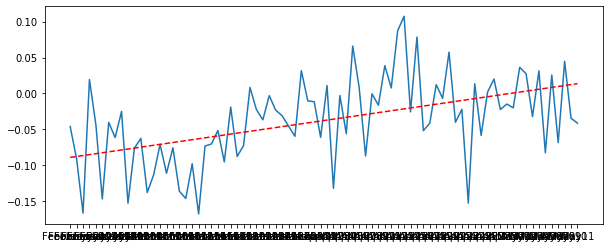

In [84]:
y = avrg_by_day['compound']
x = avrg_by_day.index
x_labels = avrg_by_day['DOM']

#ploting with matplotlib

fig, ax = plt.subplots(figsize = (10,4))
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.plot(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

# plt.show()

In [18]:
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

NameError: name 'DOM' is not defined

In [ ]:
# Makes a json 

json_object = json.dumps(comment_dict, indent = 4) 
  
with open(r"/Users/AllysonEnglish/Active/Active/sent_analysis_covid_reddit3.json", "w") as outfile: 
    outfile.write(json_object) 

In [ ]:
old_df = pd.read_csv(r'/Users/AllysonEnglish/Active/Active/sentiment_analysis_draft1.csv')

In [ ]:
to_add = df[~df['discussion_id'].isin(old_df['discussion_id'])]

In [ ]:
# df.to_csv(r'/Users/AllysonEnglish/Active/Active/sentiment_analysis_draft1.csv', index=False)
to_add.to_csv(r'/Users/AllysonEnglish/Active/Active/sentiment_analysis_draft1.csv', mode='a', header=False, index=False)



In [ ]:
# sid.polarity_scores(comment_dict['fq0o3e1'])
sid.polarity_scores(comment_dict['fq3a3nl'])

In [ ]:
# df['score'] = score

In [ ]:
# print(df.loc[['fq3a3nl']])

In [ ]:
df['score'].count
df.head(20)

In [ ]:
# score = []

# for val in df['negative']:
#     if df['negative'] >= 0.05:
#         score.append("negative")
#     else:
#         score.append("review")

In [ ]:
p_count= 0
n_count= 0

for value in df['score']:
    if value == 'positive':
        p_count=p_count+1
    elif value == 'negative':
        n_count=n_count+1

In [ ]:
n_count

In [ ]:
score = []

for value in df['negative']:
    if value > 0.08:
        score.append("negative")

In [ ]:
for each_comment in tokens_2:
#     print(each_comment)
    pol = sid.polarity_scores(each_comment)
    comment_polarity.update({each_comment: pol})
#     for j in sorted(pol):
#         print('{0}: {1}%, '.format(j, round(pol[j]*100, 2)), end='')
#         print()
    

In [ ]:
test = "Does anyone have numbers on the recovery rate of hospitalized patients not on ventilators? My 67y mom's test came back + almost 2 weeks ago, but she had to be admitted 2 days ago because her O2 saturation was dropping at home and a serial x-ray was worse. She seems mostly stable right now, but only able to reach 97% saturation on 4L O2 while at rest. I am scared as hell."

In [ ]:
testing = sid.polarity_scores(test)

In [ ]:
testing['neg']

In [ ]:
df.head()

In [ ]:
new_comments = []

In [ ]:
for k in comment_polarity.keys():
    new_comments.append(k)

In [ ]:
new_comments

In [ ]:
 comment_polarity

## Workdesk

In [ ]:
tagged_tokens = []

submission = reddit.submission(id=final_id)
for top_level_comment in submission.comments:
    submission.comments.replace_more(limit=0)
    comment = top_level_comment.body
    comment = comment.replace('\n', ' ')
    try:
        tagged = nltk.pos_tag(comment.split(' '))
        tagged_tokens.append(tagged)
    except IndexError:
        continue

In [ ]:
tagged_tokens

In [ ]:
nouns = 0
adjectives = 0

for pair in tagged_tokens:
    for tag in pair:
        if tag[1] == 'JJ':
            adjectives += 1
        elif tag[1] == 'NN':
            nouns += 1
        elif tag[1] == 'NNS':
            nouns += 1
    

print('There are', nouns, 'nouns in this text.')
print('There are', adjectives, 'adjectives in this text.')

In [ ]:
len(tagged_tokens)

In [ ]:
len([x for y in tagged_tokens for x in y])

In [ ]:
reddit_tokens = []

submission = reddit.submission(id=final_id)
for top_level_comment in submission.comments:
    submission.comments.replace_more(limit=0)
    reddit_tokens.append(top_level_comment.body)

In [ ]:
tagged_tokens = []

for token in reddit_tokens:
    try:
        tagged = nltk.pos_tag(token.split(' '))
        tagged_tokens.append(tagged)
    except IndexError:
        continue

In [ ]:
tagged_tokens[5]

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [ ]:
toast = sid.polarity_scores(bread)

In [ ]:
bread = reddit_tokens[4]

In [ ]:
cheese = ss

In [ ]:
sid.score_valence(cheese, bread)

In [ ]:
sid = SentimentIntensityAnalyzer()
for comment in reddit_tokens:
    print(comment)
    ss = sid.polarity_scores(comment)
    for k in sorted(ss):
        print('{0}: {1}%, '.format(k, round(ss[k]*100, 2)), end='')
        print()

In [ ]:
reddit_tokens

In [ ]:
# tagged_comments = nltk.pos_tag(comment.split(" "))

In [ ]:
# [item.replace('.','') for item in wordlist]
#     wordlist = [item.replace(':','') for item in wordlist]
#     wordlist = [item.replace('-','') for item in wordlist]
#     wordlist = [item.replace('?','') for item in wordlist]
#     wordlist = [item.replace('!','') for item in wordlist]
#     wordlist = [item.replace('*','') for item in wordlist]
#     wordlist = [item.replace(',','') for item in wordlist]

In [ ]:
nltk.pos_tag(comment.split(' '))

In [ ]:
tagged_tokens = []

submission = reddit.submission(id=final_id)
for top_level_comment in submission.comments:
    submission.comments.replace_more(limit=0)
    comment = top_level_comment.body
    comment.replace('\n', ' ')
    try:
        tagged = nltk.pos_tag(comment.split(' '))
        tagged_tokens.append(tagged)
    except IndexError:
        continue

In [ ]:
nltk.pos_tag(submission.comments.body.split(' '))

In [ ]:
allwords = []
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    wordlist = top_level_comment.body.split()
    wordlist = [item.replace('.','') for item in wordlist]
    wordlist = [item.replace(':','') for item in wordlist]
    wordlist = [item.replace('-','') for item in wordlist]
    wordlist = [item.replace('?','') for item in wordlist]
    wordlist = [item.replace('!','') for item in wordlist]
    wordlist = [item.replace('*','') for item in wordlist]
    wordlist = [item.replace(',','') for item in wordlist]
    wordlist = [item.replace('(','').replace(')','') for item in wordlist]
    allwords.extend(wordlist)
    
print(allwords)

In [ ]:
item = "allys'on" "aren't"
item.find("'")

In [ ]:
greeting = 'sup homie {}!'
names = ['bob', 'joe', 'ally']

for name in names:
    print(greeting.format(name))

In [ ]:
if "n't":
    "n't"
else:
    item.replace("''"," ")

In [ ]:
item.replace("'", '').replace('"', '')

In [ ]:
allwords = []
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    wordlist = top_level_comment.body.split()
    wordlist = [item.replace('.','') for item in wordlist]
    wordlist = [item.replace(':','') for item in wordlist]
    wordlist = [item.replace('-','') for item in wordlist]
    wordlist = [item.replace('?','') for item in wordlist]
    wordlist = [item.replace('!','') for item in wordlist]
    wordlist = [item.replace('*','') for item in wordlist]
    wordlist = [item.replace(',','') for item in wordlist]
    wordlist = [item.replace('(','').replace(')','') for item in wordlist]
    allwords.extend(wordlist)
    
print(allwords)

In [ ]:
for word in allwords:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency [words])

In [ ]:
frequency = {}
for w in wordlist:
    count= frequency.get(w,0)
    frequency[w]= count + 1
    wordfreq.append(wordlist.count(w))

frequency_list = frequency.keys()

for w in frequency_list:
    print (w, frequency[w])

In [ ]:
from praw.models import MoreComments
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue

In [ ]:
submission.comments.replace_more(limit=None)
comment_queue = submission.comments[:]  # Seed with top-level
while comment_queue:
    comment = comment_queue.pop(0)
    print(comment.body)
    comment_queue.extend(comment.replies)

In [ ]:
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)

In [ ]:
wordstring = top_level_comment.body
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue

In [ ]:
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [ ]:
wordstring = 'it was the best of times it was the worst of times '
wordstring += 'it was the age of wisdom it was the age of foolishness'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [ ]:
lotsofcomments = post.comments.list()

In [ ]:
onecomment = lotsofcomments[0]
onecomment

In [ ]:
onecomment.body

In [ ]:
submission = reddit.submission(id='3g1jfi')

In [ ]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)

In [ ]:
total_text = top_level_comment.body
total_analysis = total_text.split()

In [ ]:
neutral

In [ ]:
neutral
positive 
negative 
compound 
token_dict 
score 

In [ ]:
tokens[4]

In [ ]:
df.head()

In [ ]:
# blob = TextBlob("This excellent practice sentance is the best one to ues due to it's perfectly written syntax and great message.")
# for np in blob.noun_phrases:
#     print(np)

# for words, tags in blob.tags:
#     print(words, tags)
    
# for ngram in blob.ngrams(3):
#     print(ngram)

# blob.sentiment



In [ ]:
blob = TextBlob(comment_str)

In [ ]:
tokens

In [ ]:
txt_blob_dict = {}

for each_token in tokens:
    analysis_tok = TextBlob(each_token)
    txt_blob_dict.update({each_token: analysis_tok.sentiment})

In [ ]:
for tok in tokens:
    tok.replace("\n","")
    print(tok)
    

In [ ]:
comment_dict['fq67hfw']

In [ ]:
sid.polarity_scores(comment_dict['fq67hfw'].capitalize())

In [ ]:
for words in TextBlob(comment_dict['fq67hfw']).ngrams(5):
    print(words)

In [ ]:
tb_score = TextBlob(comment_dict['fq67hfw']).sentiment
tb_score

In [ ]:
test = tokens[1]

In [ ]:
test = test.replace("I\'m","I am").replace("\n"," ").replace("i\'ll","i will").replace("i\'m","i will").lower()

In [ ]:
sid.polarity_scores(test)

In [ ]:
tb_score = TextBlob(test).sentiment

In [ ]:
tb_score

In [ ]:
trainer = NaiveBayesClassifier.train

daily_discussion = list(subreddit.hot(limit=1))
discussion_id = (str(daily_discussion))
final_id = discussion_id.replace("[Submission(id='","").replace("')]","")
print(final_id)

submission = reddit.submission(id=final_id)

In [ ]:
subreddit = reddit.subreddit('Coronavirus')
daily_discussion = list(subreddit.hot(limit=1))
final_id = discussion_id.replace("[Submission(id='","").replace("')]","")
print(final_id)

submission = reddit.submission(id=final_id)

In [ ]:
for coms in subreddit.comments(1589069774, 1589156174):
    print(coms)

In [ ]:
len("1485796660")

In [ ]:
x = 1589156174

In [ ]:
#Code for running textblob.


# blob = TextBlob("This excellent practice sentance is the best one to ues due to it's perfectly written syntax and great message.")
# for np in blob.noun_phrases:
#     print(np)

# for words, tags in blob.tags:
#     print(words, tags)
    
# for ngram in blob.ngrams(3):
#     print(ngram)

# blob.sentiment

In [ ]:

#ploting with matplotlib

# plt.plot(y, x)
# plt.show()